In [1]:
import numpy as np
import math
import matplotlib.pylab as plt
import astropy.io.fits as fits
import os
import pandas as pd
from astropy import units as u
import astroquery
import time
from astroquery.atomic import AtomicLineList as alist
%matplotlib inline

In [21]:
def plotWavelength(wavelength, spectralArr, specLambda, lambdaRange):
    """
    plots the star's spectrum at a specific wavelength, along with a vertical line at that wavelength
    
    wavelength (list): list of wavelengths presented in the star's data
    spectralArr (list): list of intensity data for each wavelength in wavelength
    specLambda (float): the specific wavelength we want to look at
    lambdaRange (float): the range of wavelength to be shown in the plot
    """
    plt.plot(wavelength, spectralArr)
    plt.grid(True)
    plt.xlim(specLambda-lambdaRange/2, specLambda+lambdaRange/2)
    plt.title(str(specLambda)+" Å")
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('Intensity')
    plt.vlines(specLambda, ymin = min(spectralArr), ymax = max(spectralArr))
    plt.show()

In [42]:
def isLine(wavelength, spectrum, wl, wlrange, doPlot = False):
    """
    determines if there is a line at a specific wavelength
    
    wavelength (list): list of wavelength presented in a star's spectrum
    spectrum (list): list of a star's intensity at each wavelength in wavelength
    wl (float): the wavelength we want to find out if there is an absorption line
    wlrange (int): range of specification (default at 1 Angstrom)
    doPlot (bool): indicates if we want to see the plot of the spectrum
    
    returns: a bool indicating if there is a line at the wavelength wl
    """
    wlList = np.array(wavelength)
    spectrumList = np.array(spectrum)
    indexclosest = np.argmin(np.abs(wlList - wl))
    median = np.median(spectrumList[np.where((wavelength > wl-wlrange/2) & (wavelength < wl+wlrange/2))])
    sd = np.std(spectrumList[np.where((wavelength > wl-wlrange/2) & (wavelength < wl+wlrange/2))])
    mean = np.mean(spectrumList[np.where((wavelength > wl-wlrange/2) & (wavelength < wl+wlrange/2))])
    
    #plot initial spectrum
    if doPlot: 
        plt.plot(wavelength, spectrum)
    
    #initiate variables
    index1 = index2 = indexclosest
    line_exist = False
    plotted_list = {}
    
    #plotting prospective dip
    while spectrum[index1] <= median:
        if doPlot: 
            plt.plot([wavelength[index1]], [spectrum[index1]], 'ko')
        plotted_list[index1] = spectrum[index1]
        index1 += 1
    while spectrum[index2] <= median:
        if doPlot: 
            plt.plot([wavelength[index2]], [spectrum[index2]], 'ko')
        plotted_list[index2] = spectrum[index2]
        index2 -= 1
    
    #determining existence of line
    try: 
        if( 
            plotted_list[indexclosest] != 0 
            and plotted_list[indexclosest] <= np.percentile(list(plotted_list.values()), 3) 
            and abs(median - plotted_list[indexclosest]) >= 2*sd
            and max(plotted_list.values()) - min(plotted_list.values()) >= sd
            and sd/mean >= 0.01
        ):
            line_exist = True
            label_str = "Line detected"
        else:
            label_str = "No line detected"
    except:
        label_str = "No line detected"
    
    #showing plot + return
    if doPlot: 
        plt.grid(True)
        plt.xlim(wl-wlrange/2, wl+wlrange/2)
        plt.title(str(wl)+" Å")
        plt.xlabel('Wavelength (Å)')
        plt.ylabel('Intensity') 
        if line_exist:
            plt.vlines(wl, ymin = 0, ymax = 2*median, colors = 'b', label = label_str)
        else:
            plt.vlines(wl, ymin = 0, ymax = 2*median, colors = 'r', label = label_str)
        plt.legend()
        plt.show()

    return line_exist

In [43]:
#Example: using these two functions on Sun's spectrum in this GitHub folder
filepath = "Sun/"
filelist = os.listdir(filepath)
filelist[0]

'r.HARPN.2015-07-30T12:40:51.074_S1D_A.fits'

In [44]:
hdul = fits.open(filepath + filelist[0])
hdul.info()

Filename: Sun/r.HARPN.2015-07-30T12:40:51.074_S1D_A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     836   ()      
  1                1 BinTableHDU     24   212207R x 5C   [1D, 1D, 1D, 1D, 1J]   


In [45]:
data = hdul[1].data
data

FITS_rec([(3869.99140072, 3868.89459449, 0., 0., 16384),
          (3870.00198602, 3868.90517704, 0., 0., 16384),
          (3870.01257135, 3868.91575962, 0., 0., 16384), ...,
          (6914.8925172 , 6912.98543252, 0., 0., 16384),
          (6914.91143099, 6913.00434122, 0., 0., 16384),
          (6914.93034484, 6913.02324998, 0., 0., 16384)],
         dtype=(numpy.record, [('wavelength', '>f8'), ('wavelength_air', '>f8'), ('flux', '>f8'), ('error', '>f8'), ('quality', '>i4')]))

In [46]:
wavelength = data.field(1)
wavelength

array([3868.89459449, 3868.90517704, 3868.91575962, ..., 6912.98543252,
       6913.00434122, 6913.02324998])

In [47]:
sunSpectrum = data.field(2)
sunSpectrum

array([0., 0., 0., ..., 0., 0., 0.])

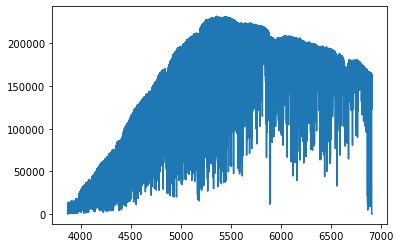

In [48]:
plt.plot(wavelength, sunSpectrum)
#sample plot of the Sun's overall spectrum

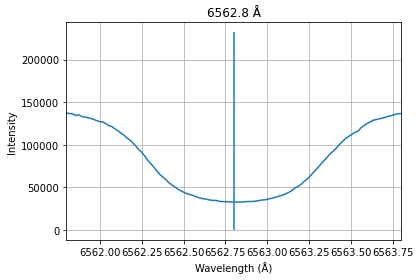

In [49]:
plotWavelength(wavelength, sunSpectrum, 6562.8, 2)
#Example of plotWavelength function

In [50]:
isLine(wavelength, sunSpectrum, 5000.2109, 1)
#Example of isLine with doPlot set to False

False

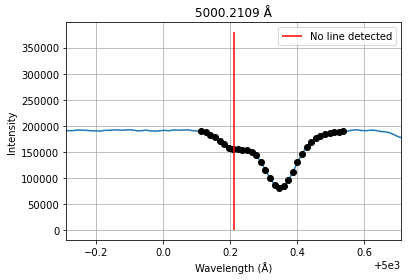

False

In [56]:
isLine(wavelength, sunSpectrum, 5000.2109, 1, True)
#Example of isLine with doPlot set to True